# Evaluate all embeddings generated with parameter_search

In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import datetime
import pickle

In [2]:
from evaluation_functions import nn, sil

In [3]:
wd = os.getcwd()

DF = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "processed", "df_focal_reduced.pkl")
OUT_COORDS = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "interim", "parameter_search", "umap_coords")
OUT_EVALS = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "interim", "parameter_search", "umap_evals")

In [4]:
spec_df = pd.read_pickle(DF)
print(spec_df.shape)
labels = spec_df.call_lable.values
labeltypes = sorted(list(set(labels)))

(6430, 28)


In [72]:
all_embedding_files = list(sorted(os.listdir(OUT_COORDS)))

In [73]:
params = ['preprocess_type', 'metric_type', 'duration_method','min_dist', 'spread', 'n_neighbors', 'n_comps', 'input_type', 'n_repeat']

In [92]:
eval_colnames = params+ ['S_total'] + ['S_'+x for x in labeltypes] + ['Snorm_total'] + ['Snorm_'+x for x in labeltypes] + ['SIL_total'] + ['SIL_'+x for x in labeltypes]+['knncc_'+x for x in labeltypes]
print(eval_colnames)

eval_table = np.zeros((len(all_embedding_files), len(eval_colnames)))
eval_table = pd.DataFrame(eval_table, columns=eval_colnames)

['preprocess_type', 'metric_type', 'duration_method', 'min_dist', 'spread', 'n_neighbors', 'n_comps', 'input_type', 'n_repeat', 'S_total', 'S_agg', 'S_al', 'S_cc', 'S_ld', 'S_mo', 'S_sn', 'S_soc', 'Snorm_total', 'Snorm_agg', 'Snorm_al', 'Snorm_cc', 'Snorm_ld', 'Snorm_mo', 'Snorm_sn', 'Snorm_soc', 'SIL_total', 'SIL_agg', 'SIL_al', 'SIL_cc', 'SIL_ld', 'SIL_mo', 'SIL_sn', 'SIL_soc', 'knncc_agg', 'knncc_al', 'knncc_cc', 'knncc_ld', 'knncc_mo', 'knncc_sn', 'knncc_soc']


In [93]:
k=5

for i,embedding_file in enumerate(all_embedding_files):
    
    embedding = np.loadtxt(os.path.join(os.path.sep, OUT_COORDS, embedding_file),delimiter=";")
    
    embedding_params_string = embedding_file.replace('.csv', '')
    embedding_params_list = embedding_params_string.split('_')
    
    nn_stats = nn(embedding, labels, k=k)
    sil_stats = sil(embedding, labels)

    eval_vector = embedding_params_list + [nn_stats.get_S()] + list(nn_stats.get_ownclass_S()) + [nn_stats.get_Snorm()] + list(nn_stats.get_ownclass_Snorm()) + [sil_stats.get_avrg_score()] + list(sil_stats.get_score_per_class()) + list(nn_stats.knn_cc())
    eval_table.loc[i,:] = eval_vector

In [24]:
eval_table

,preprocess_type,metric_type,duration_method,min_dist,spread,n_neighbors,n_comps,input_type,n_repeat,S_total,...,SIL_mo,SIL_sn,SIL_soc,knncc_agg,knncc_al,knncc_cc,knncc_ld,knncc_mo,knncc_sn,knncc_soc
0,no,manhattan,pad,0,1,15,5,melspecs,0,51.194697,...,-0.167510,0.391238,-0.413327,5.333333,35.758514,21.123900,0.000000,13.043478,78.652291,22.270364
1,no,manhattan,pad,0,1,15,5,melspecs,1,51.035012,...,-0.168814,0.386173,-0.415502,4.800000,35.913313,21.665538,0.000000,12.648221,78.975741,21.837088
2,no,manhattan,pad,0,1,15,5,melspecs,2,51.904037,...,-0.169296,0.391640,-0.413507,5.866667,35.294118,21.394719,0.000000,14.097497,79.137466,22.790295
3,no,manhattan,pad,0,1,15,5,melspecs,3,51.535663,...,-0.172852,0.402661,-0.419195,3.733333,36.842105,20.920785,0.000000,14.624506,78.921833,22.963605
4,no,manhattan,pad,0,1,15,5,melspecs,4,51.602490,...,-0.172395,0.389527,-0.418448,4.800000,35.139319,19.295870,0.000000,12.516469,79.407008,22.443674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,zs,manhattan,timeshift-pad,0,1,15,5,melspecs,0,66.007241,...,0.308355,0.556464,-0.045367,11.466667,56.037152,56.668923,3.048780,39.789196,83.773585,37.521664
106,zs,manhattan,timeshift-pad,0,1,15,5,melspecs,1,66.131070,...,0.314196,0.534360,-0.052162,9.866667,57.739938,55.856466,3.658537,39.130435,85.336927,38.388215
107,zs,manhattan,timeshift-pad,0,1,15,5,melspecs,2,65.869564,...,0.298013,0.537106,-0.049484,4.800000,55.572755,56.194990,4.268293,37.417655,83.557951,39.514731
108,zs,manhattan,timeshift-pad,0,1,15,5,melspecs,3,62.159519,...,-0.099196,0.156060,-0.106159,6.933333,48.452012,45.633040,4.268293,34.387352,82.048518,34.055459


In [77]:
eval_table['knncc_total'] = eval_table[['knncc_'+x for x in labeltypes]].mean(axis=1)

In [78]:
eval_table["min_dist"] = pd.to_numeric(eval_table["min_dist"])
eval_table["n_neighbors"] = pd.to_numeric(eval_table["n_neighbors"])
eval_table["spread"] = pd.to_numeric(eval_table["spread"])
eval_table["n_comps"] = pd.to_numeric(eval_table["n_comps"])
eval_table["n_repeat"] = pd.to_numeric(eval_table["n_repeat"])

In [79]:
outname = os.path.join(os.path.sep, OUT_EVALS, 'eval_table_'+str(k)+'.csv')
eval_table.to_csv(outname, sep=";")

## Plot results

In [14]:
import matplotlib.pyplot as plt

FIGURES = os.path.join(os.path.sep, str(Path(wd).parents[0]), "reports", "figures", "parameter_search")

In [5]:
outname = os.path.join(os.path.sep, OUT_EVALS, 'eval_table_5.csv')
eval_table = pd.read_csv(outname, sep=";")

In [6]:
calltypes = sorted(list(set(spec_df.call_lable)))

outvars = ["S_total"]
outvars = ['S_'+x for x in calltypes]
outvars

['S_agg', 'S_al', 'S_cc', 'S_ld', 'S_mo', 'S_sn', 'S_soc']

In [7]:
params = ['preprocess_type', 'metric_type', 'duration_method','min_dist', 'spread', 'n_neighbors', 'n_comps', 'input_type', 'n_repeat']
p_default = dict(zip(params[:-1], ['zs', 'manhattan', 'pad', 0, 1, 15, 5, 'melspecs']))

In [8]:
param = params[0]

other_params = set(params).difference([param, 'n_repeat'])

df = eval_table
for p in other_params:
    df = df.loc[df[p]==p_default[p],:]
print(df.shape)
#boxplot = df[[param]+[outvars]].boxplot(by=param)
df = df[[param]+outvars]
#[param]+outvars

(25, 42)


In [83]:
params

['preprocess_type',
 'metric_type',
 'duration_method',
 'min_dist',
 'spread',
 'n_neighbors',
 'n_comps',
 'input_type',
 'n_repeat']

(20, 42)


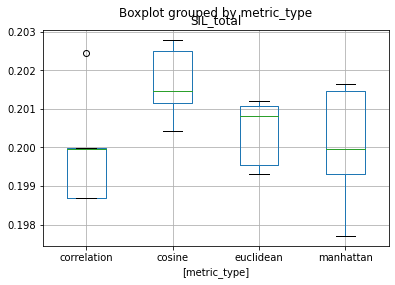

In [24]:
param = 'input_type'
param = 'duration_method'
param='preprocess_type'
param = 'n_neighbors'
param = 'metric_type'

outvar = 'SIL_total'
other_params = set(params).difference([param, 'n_repeat'])

df = eval_table
for p in other_params:
    df = df.loc[df[p]==p_default[p],:]
print(df.shape)
boxplot = df[[param]+[outvar]].boxplot(by=param)
plt.savefig(os.path.join(os.path.sep, FIGURES,outvar+'_'+param+'_.jpg'))

In [85]:
param = 'input_type'
param = 'duration_method'
param='preprocess_type'
param = 'n_neighbors'
#param = 'metric_type'

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

(20, 42)


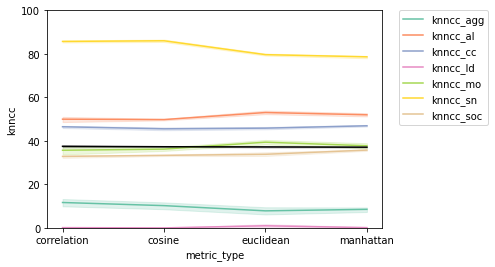

In [40]:
param = 'input_type'
param = 'duration_method'
param='preprocess_type'
param = 'n_neighbors'
param = 'metric_type'

out_v = 'knncc'
outvars = [out_v+'_'+x for x in calltypes]
other_params = set(params).difference([param, 'n_repeat'])

df = eval_table
for p in other_params:
    df = df.loc[df[p]==p_default[p],:]
print(df.shape)
means = df[[param, out_v+'_total']]
df = df[[param]+outvars]

melted = pd.melt(df, id_vars=param, value_vars=outvars)
melted = melted.sort_values(by=param)

sns.lineplot(x=param, y="value", hue="variable", data=melted, palette="Set2", hue_order=outvars, err_style='band')
sns.lineplot(x=param, y=out_v+'_total', data=means, color='black')
plt.ylabel(out_v)
plt.ylim(0,100)
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
plt.savefig(os.path.join(os.path.sep, FIGURES,out_v+'_'+param+'_.jpg'))

(20, 42)


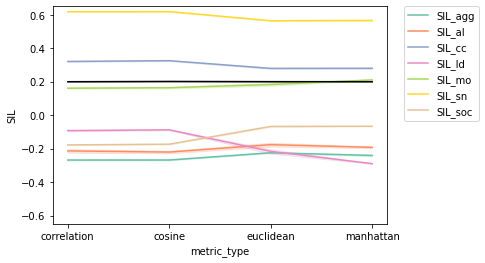

In [35]:
param = 'input_type'
param = 'duration_method'
param='preprocess_type'
param = 'n_neighbors'
param = 'metric_type'

out_v = 'SIL'
#out_v = 'knncc'
outvars = [out_v+'_'+x for x in calltypes]
other_params = set(params).difference([param, 'n_repeat'])

df = eval_table
for p in other_params:
    df = df.loc[df[p]==p_default[p],:]
print(df.shape)
means = df[[param, out_v+'_total']]
df = df[[param]+outvars]

melted = pd.melt(df, id_vars=param, value_vars=outvars)
melted = melted.sort_values(by=param)

sns.lineplot(x=param, y="value", hue="variable", data=melted, palette="Set2", hue_order=outvars, err_style='band')
sns.lineplot(x=param, y=out_v+'_total', data=means, color='black')
plt.ylabel(out_v)
plt.ylim(-0.65, 0.65)
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
plt.savefig(os.path.join(os.path.sep, FIGURES,out_v+'_'+param+'_.jpg'))


(20, 42)


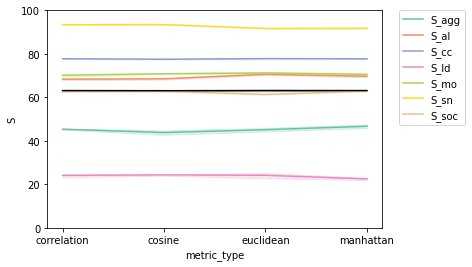

In [30]:
#import seaborn as sns
param = 'input_type'
param = 'duration_method'
param='preprocess_type'
param = 'n_neighbors'
param = 'metric_type'

out_v = 'S'
outvars = [out_v+'_'+x for x in calltypes]
other_params = set(params).difference([param, 'n_repeat'])

df = eval_table
for p in other_params:
    df = df.loc[df[p]==p_default[p],:]
print(df.shape)
means = df[[param, out_v+'_total']]
df = df[[param]+outvars]

melted = pd.melt(df, id_vars=param, value_vars=outvars)
melted = melted.sort_values(by=param)

sns.lineplot(x=param, y="value", hue="variable", data=melted, palette="Set2", hue_order=outvars, err_style='band')
sns.lineplot(x=param, y=out_v+'_total', data=means, color='black')
plt.ylabel(out_v)
plt.ylim(0, 100)
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
plt.savefig(os.path.join(os.path.sep, FIGURES,out_v+'_'+param+'_.jpg'))

In [165]:
param

'preprocess_type'

In [150]:
calltypes = sorted(list(set(spec_df.call_lable)))
outvars = ["SIL_total"]
outvars = ['SIL_'+x for x in calltypes]
outvars

['SIL_agg', 'SIL_al', 'SIL_cc', 'SIL_ld', 'SIL_mo', 'SIL_sn', 'SIL_soc']

In [51]:
param = params[0]
other_params = set(params).difference([param, 'n_repeat'])


df = eval_table
for p in other_params:
    df = df.loc[df[p]==p_default[p],:]
print(df.shape)
#boxplot = df[[param]+[outvars]].boxplot(by=param)
df = df[[param]+outvars]

levels = sorted(list(set(df[param])))
mean_df = df.groupby([param]).mean()
std_df = df.groupby([param]).std()
#outvar = outvars[0]
#df[outvar].values

(25, 41)


In [52]:
pal = sns.color_palette("Set2", n_colors=len(outvars))
color_dict = dict(zip(outvars, pal))

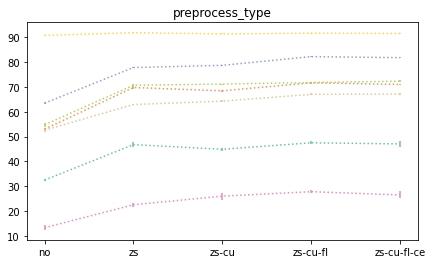

In [54]:
# example data
x = levels
ls = 'dotted'
fig, ax = plt.subplots(figsize=(7, 4))

for outvar in outvars:
    y = mean_df[outvar].values
    yerr = std_df[outvar].values
    ax.errorbar(x, y, yerr=yerr, linestyle=ls, color=color_dict[outvar])

#ax.set_ylim((0, 100))
ax.set_title(param)
plt.show()

In [ ]:
#df = df.groupby([param]).mean()